In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [3]:
# Data preparation

In [4]:
df = pd.read_csv("/Users/Gustavodamasco/Desktop/Datasets/Spending_habits/Responses.csv")

In [5]:
df_spending = df.iloc[:, 133]

In [6]:
df_personality = df.iloc[:, 76:133]

In [7]:
df_data = pd.concat((df_personality, df_spending), axis=1)

In [8]:
lying_dummies = pd.get_dummies(df_data["Lying"], prefix="Lying").iloc[:, 1:]
ponctuality_dummies = pd.get_dummies(df_data["Punctuality"], prefix="Punctuality").iloc[:, 1:]
internet_usage_dummies = pd.get_dummies(df_data["Internet usage"], prefix="Internet usage").iloc[:, 1:]

In [9]:
df_data_model = pd.concat([df_data, lying_dummies, ponctuality_dummies, internet_usage_dummies], axis=1)

In [10]:
df_data_model = df_data_model.drop(["Lying", "Punctuality", "Internet usage"], axis=1)

In [11]:
df_data_model.loc[df_data_model['Finances'] <= 3, 'Finances'] = 0
df_data_model.loc[df_data_model['Finances'] > 3, 'Finances'] = 1

In [12]:
df_data_model.head()

,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,...,Questionnaires or polls,Finances,Lying_never,Lying_only to avoid hurting someone,Lying_sometimes,Punctuality_i am often early,Punctuality_i am often running late,Internet usage_less than an hour a day,Internet usage_most of the day,Internet usage_no time at all
0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,...,3.0,0.0,1,0,0,0,0,0,0,0
1,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,...,3.0,0.0,0,0,1,1,0,0,0,0
2,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,...,1.0,0.0,0,0,1,0,1,0,0,0
3,4.0,4.0,4.0,5.0,3.0,1.0,3.0,4.0,5.0,2.0,...,4.0,0.0,0,1,0,1,0,0,1,0
4,3.0,1.0,2.0,3.0,5.0,5.0,5.0,4.0,2.0,3.0,...,3.0,1.0,0,0,0,0,0,0,0,0


In [13]:
df_data_model_dropped = df_data_model.dropna(axis=0).copy()
df_data_model_dropped.shape

(864, 63)

In [14]:
df_data_model_mode = df_data_model.copy()
for i in df_data_model_mode.columns:
    df_data_model_mode[i].fillna(df_data_model_mode[i].mode()[0], inplace=True)
    
df_data_model_mode.shape

(1010, 63)

In [15]:
# X and y

In [16]:
X_dropped = df_data_model_dropped.drop("Finances", axis=1)
y_dropped = df_data_model_dropped["Finances"]

X_mode = df_data_model_mode.drop("Finances", axis=1)
y_mode = df_data_model_mode["Finances"]

In [17]:
# Split the data

In [18]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(X_dropped, y_dropped, random_state=1, test_size=0.2)

X_train_mode, X_test_mode, y_train_mode, y_test_mode = train_test_split(X_mode, y_mode, random_state=1, test_size=0.2)

/Users/Gustavodamasco/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
# Model Evaluation - Base model

In [20]:
from sklearn import dummy, metrics

In [21]:
model_dummy = dummy.DummyClassifier()
model_dummy.fit(X_train_dropped, y_train_dropped)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [26]:
y_test_mode.value_counts

<bound method Series.value_counts of 915     1.0
701     1.0
293     0.0
507     0.0
970     0.0
248     0.0
719     0.0
910     1.0
329     0.0
49      1.0
459     1.0
142     0.0
382     0.0
250     1.0
807     0.0
133     0.0
104     0.0
6       1.0
921     1.0
509     1.0
977     0.0
573     0.0
434     0.0
27      0.0
993     1.0
119     1.0
108     0.0
766     1.0
833     1.0
842     0.0
       ... 
81      0.0
238     0.0
954     0.0
713     0.0
202     0.0
1000    0.0
228     1.0
992     0.0
216     0.0
597     0.0
50      1.0
517     0.0
516     0.0
652     1.0
958     0.0
201     0.0
924     1.0
194     0.0
841     0.0
673     1.0
835     0.0
236     0.0
592     0.0
255     1.0
443     0.0
759     1.0
599     0.0
902     0.0
426     0.0
452     0.0
Name: Finances, Length: 202, dtype: float64>

In [279]:
y_pred_mode_dummy = model_dummy.predict(X_test_mode)

In [280]:
# confusion matrix
print(metrics.confusion_matrix(y_test_mode, y_pred_mode_dummy))

[[80 53]
 [47 22]]


In [281]:
# save confusion matrix and slice into four pieces
confusion_dummy = metrics.confusion_matrix(y_test_mode, y_pred_mode_dummy)
TP_dummy = confusion_dummy[1, 1]
TN_dummy = confusion_dummy[0, 0]
FP_dummy = confusion_dummy[0, 1]
FN_dummy = confusion_dummy[1, 0]

In [282]:
#Classification Accuracy: Overall, how often is the classifier correct?
print(metrics.accuracy_score(y_test_mode, y_pred_mode_dummy))

0.50495049505


In [283]:
#Classification Error: Overall, how often is the classifier incorrect?
print(1 - metrics.accuracy_score(y_test_mode, y_pred_mode_dummy))

0.49504950495


In [284]:
#Sensitivity (RECALL): When the actual value is positive, how often is the prediction correct?
print(metrics.recall_score(y_test_mode, y_pred_mode_dummy))

0.31884057971


In [285]:
#Specificity: When the actual value is negative, how often is the prediction correct?
print(TN_dummy / float(TN_dummy + FP_dummy))

0.601503759398


In [286]:
#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
print(FP_dummy / float(TN_dummy + FP_dummy))

0.398496240602


In [287]:
#Precision: When a positive value is predicted, how often is the prediction correct?
print(metrics.precision_score(y_test_mode, y_pred_mode_dummy))

0.293333333333


In [288]:
# classification report
from sklearn.metrics import classification_report
print classification_report(y_test_mode, y_pred_mode_dummy)

             precision    recall  f1-score   support

        0.0       0.63      0.60      0.62       133
        1.0       0.29      0.32      0.31        69

avg / total       0.51      0.50      0.51       202



In [289]:
# print the first 10 predicted responses
model_dummy.predict(X_test_mode)[0:10]

array([ 0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.])

In [290]:
# print the first 10 predicted probabilities of class membership
model_dummy.predict_proba(X_test_mode)[0:10, :]

array([[1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0]])

In [291]:
# print the first 10 predicted probabilities for class 1
model_dummy.predict_proba(X_test_mode)[0:10, 1]

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [292]:
# store the predicted probabilities for class 1
y_pred_mode_dummy_prob = model_dummy.predict_proba(X_test_mode)[:, 1]

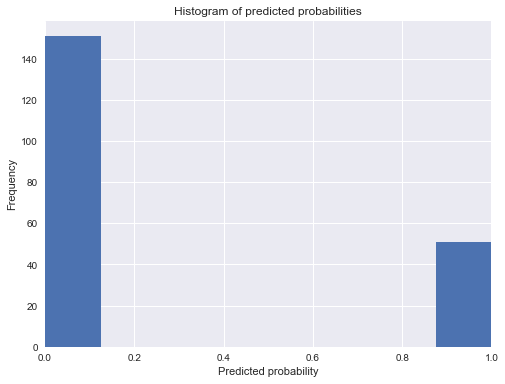

In [293]:
# histogram of predicted probabilities
plt.hist(y_pred_mode_dummy_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')

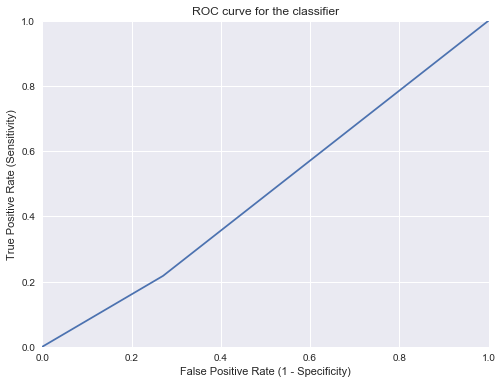

In [294]:
# Plot the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test_mode, y_pred_mode_dummy_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for the classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [295]:
# AUC is the percentage of the ROC plot that is underneath the curve:
print(metrics.roc_auc_score(y_test_mode, y_pred_mode_dummy_prob))

0.473357306309


In [296]:
# Model Evaluation - KNN

In [297]:
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier()

In [298]:
# define the parameter values that should be searched
k_range = list(range(1, 100, 10))
weights = ["uniform", "distance"]
algorithm = ["ball_tree","kd_tree", "brute", "auto"]
leaf_size = list(range(1, 100, 10))
print(k_range)
print(weights)
print(algorithm)
print(leaf_size)

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91]
['uniform', 'distance']
['ball_tree', 'kd_tree', 'brute', 'auto']
[1, 11, 21, 31, 41, 51, 61, 71, 81, 91]


In [299]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid_knn = dict(n_neighbors=k_range, weights=weights, algorithm=algorithm, leaf_size=leaf_size)
print(param_grid_knn)

{'n_neighbors': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91], 'weights': ['uniform', 'distance'], 'leaf_size': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91], 'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']}


In [300]:
# instantiate the grid
grid_knn = GridSearchCV(knn, param_grid_knn, cv=10,scoring="precision", n_jobs=-1, verbose=1)

In [301]:
# fit the grid with data
grid_knn.fit(X_train_mode, y_train_mode)

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


/Users/Gustavodamasco/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Gustavodamasco/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Gustavodamasco/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Gustavodamasco/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=-1)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91], 'weights': ['uniform', 'distance'], 'leaf_size': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91], 'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, scoring='precision', verbose=1)

In [302]:
# examine the best model
print(grid_knn.best_params_)
print(grid_knn.best_estimator_)

{'n_neighbors': 31, 'weights': 'uniform', 'leaf_size': 11, 'algorithm': 'kd_tree'}
KNeighborsClassifier(algorithm='kd_tree', leaf_size=11, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=31, p=2,
           weights='uniform')


In [303]:
# make predictions
y_pred_mode_knn = grid_knn.predict(X_test_mode)

In [304]:
# confusion matrix
print(metrics.confusion_matrix(y_test_mode, y_pred_mode_knn))

[[129   4]
 [ 66   3]]


In [305]:
# save confusion matrix and slice into four pieces
confusion_knn = metrics.confusion_matrix(y_test_mode, y_pred_mode)
TP_knn = confusion_knn[1, 1]
TN_knn = confusion_knn[0, 0]
FP_knn = confusion_knn[0, 1]
FN_knn = confusion_knn[1, 0]

In [306]:
#Classification Accuracy: Overall, how often is the classifier correct?
print(metrics.accuracy_score(y_test_mode, y_pred_mode_knn))

0.653465346535


In [307]:
#Classification Error: Overall, how often is the classifier incorrect?
print(1 - metrics.accuracy_score(y_test_mode, y_pred_mode_knn))

0.346534653465


In [308]:
#Sensitivity (RECALL): When the actual value is positive, how often is the prediction correct?
print(metrics.recall_score(y_test_mode, y_pred_mode_knn))

0.0434782608696


In [309]:
#Specificity: When the actual value is negative, how often is the prediction correct?
print(TN_knn / float(TN_knn + FP_knn))

0.96992481203


In [310]:
#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
print(FP_knn / float(TN_knn + FP_knn))

0.0300751879699


In [311]:
#Precision: When a positive value is predicted, how often is the prediction correct?
print(metrics.precision_score(y_test_mode, y_pred_mode_knn))

0.428571428571


In [312]:
# classification report
from sklearn.metrics import classification_report
print classification_report(y_test_mode, y_pred_mode_knn)

             precision    recall  f1-score   support

        0.0       0.66      0.97      0.79       133
        1.0       0.43      0.04      0.08        69

avg / total       0.58      0.65      0.54       202



In [313]:
# print the first 10 predicted responses
grid_knn.predict(X_test_mode)[0:10]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [314]:
# print the first 10 predicted probabilities of class membership
grid_knn.predict_proba(X_test_mode)[0:10, :]

array([[ 0.74193548,  0.25806452],
       [ 0.87096774,  0.12903226],
       [ 0.70967742,  0.29032258],
       [ 0.77419355,  0.22580645],
       [ 0.83870968,  0.16129032],
       [ 0.70967742,  0.29032258],
       [ 0.67741935,  0.32258065],
       [ 0.64516129,  0.35483871],
       [ 0.74193548,  0.25806452],
       [ 0.77419355,  0.22580645]])

In [315]:
# print the first 10 predicted probabilities for class 1
grid_knn.predict_proba(X_test_mode)[0:10, 1]

array([ 0.25806452,  0.12903226,  0.29032258,  0.22580645,  0.16129032,
        0.29032258,  0.32258065,  0.35483871,  0.25806452,  0.22580645])

In [316]:
# store the predicted probabilities for class 1
y_pred_mode_knn_prob = grid_knn.predict_proba(X_test_mode)[:,1]

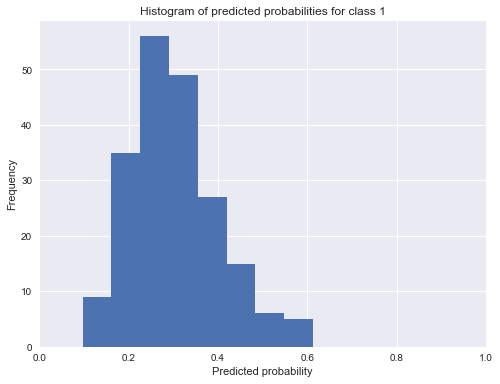

In [317]:
# histogram of predicted probabilities
plt.hist(y_pred_mode_knn_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities for class 1')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')

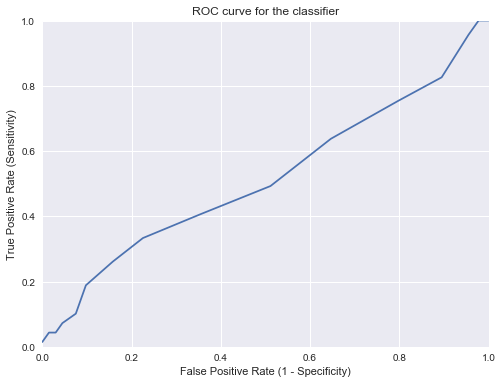

In [318]:
# Plot the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test_mode, y_pred_mode_knn_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for the classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [319]:
# AUC is the percentage of the ROC plot that is underneath the curve:
print(metrics.roc_auc_score(y_test_mode, y_pred_mode_knn_prob))

0.516181758745


In [320]:
#Model Evaluation - Random Forest

In [64]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

Rforest = RandomForestClassifier()

In [65]:
# define the parameter values that should be searched
n_estimators = list(range(100, 501, 100))
max_depth = [3, 4, 5, 6, 7, 8]
max_features = ['auto', 3,4,5,6,7]
class_weight = [{0:0.3,1:0.7}]
print(n_estimators)
print(max_depth)
print(max_features)
print(class_weight)

[100, 200, 300, 400, 500]
[3, 4, 5, 6, 7, 8]
['auto', 3, 4, 5, 6, 7]
[{0: 0.3, 1: 0.7}]


In [66]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid_Rforest = dict(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
print(param_grid_Rforest)

{'max_features': ['auto', 3, 4, 5, 6, 7], 'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [3, 4, 5, 6, 7, 8]}


In [67]:
# instantiate the grid
grid_Rforest = GridSearchCV(Rforest, param_grid_Rforest, cv=10,scoring="precision", n_jobs=-1, verbose=1)

In [68]:
# fit the grid with data
grid_Rforest.fit(X_train_mode, y_train_mode)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


/Users/Gustavodamasco/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Gustavodamasco/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Gustavodamasco/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Gustavodamasco/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=-1)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': ['auto', 3, 4, 5, 6, 7], 'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='precision', verbose=1)

In [208]:
# examine the best model
print(grid_Rforest.best_params_)
print(grid_Rforest.best_estimator_)

{'max_features': 4, 'n_estimators': 400, 'max_depth': 6}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=4, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [209]:
# make predictions
y_pred_mode_Rforest = grid_Rforest.predict(X_test_mode)

In [210]:
# confusion matrix
print(metrics.confusion_matrix(y_test_mode, y_pred_mode_Rforest))

[[129   4]
 [ 63   6]]


In [211]:
# save confusion matrix and slice into four pieces
confusion_Rforest = metrics.confusion_matrix(y_test_mode, y_pred_mode_Rforest)
TP_Rforest = confusion_Rforest[1, 1]
TN_Rforest = confusion_Rforest[0, 0]
FP_Rforest = confusion_Rforest[0, 1]
FN_Rforest = confusion_Rforest[1, 0]

In [212]:
#Classification Accuracy: Overall, how often is the classifier correct?
print(metrics.accuracy_score(y_test_mode, y_pred_mode_Rforest))

0.668316831683


In [213]:
#Classification Error: Overall, how often is the classifier incorrect?
print(1 - metrics.accuracy_score(y_test_mode, y_pred_mode_Rforest))

0.331683168317


In [214]:
#Sensitivity: When the actual value is positive, how often is the prediction correct?
print(metrics.recall_score(y_test_mode, y_pred_mode_Rforest))

0.0869565217391


In [215]:
#Specificity: When the actual value is negative, how often is the prediction correct?
print(TN_Rforest / float(TN_Rforest + FP_Rforest))

0.96992481203


In [216]:
#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
print(FP_Rforest / float(TN_Rforest + FP_Rforest))

0.0300751879699


In [217]:
#Precision: When a positive value is predicted, how often is the prediction correct?
print(metrics.precision_score(y_test_mode, y_pred_mode_Rforest))

0.6


In [218]:
# classification report
from sklearn.metrics import classification_report
print classification_report(y_test_mode, y_pred_mode_Rforest)

             precision    recall  f1-score   support

        0.0       0.67      0.97      0.79       133
        1.0       0.60      0.09      0.15        69

avg / total       0.65      0.67      0.57       202



In [146]:
# print the first 10 predicted responses
grid_Rforest.predict(X_test_mode)[0:10]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [147]:
# print the first 10 predicted probabilities of class membership
grid_Rforest.predict_proba(X_test_mode)[0:10, :]

array([[ 0.63159346,  0.36840654],
       [ 0.68744528,  0.31255472],
       [ 0.64473836,  0.35526164],
       [ 0.72065253,  0.27934747],
       [ 0.64905952,  0.35094048],
       [ 0.66744455,  0.33255545],
       [ 0.6752293 ,  0.3247707 ],
       [ 0.63120396,  0.36879604],
       [ 0.62998516,  0.37001484],
       [ 0.70206157,  0.29793843]])

In [148]:
# print the first 10 predicted probabilities for class 1
grid_Rforest.predict_proba(X_test_mode)[0:10, 1]

array([ 0.36840654,  0.31255472,  0.35526164,  0.27934747,  0.35094048,
        0.33255545,  0.3247707 ,  0.36879604,  0.37001484,  0.29793843])

In [149]:
# store the predicted probabilities for class 1
y_pred_mode_Rforest_prob = grid_Rforest.predict_proba(X_test_mode)[:, 1]

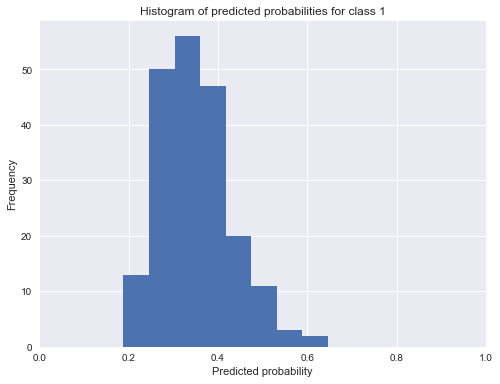

In [234]:
# histogram of predicted probabilities
plt.hist(y_pred_mode_Rforest_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities for class 1')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')

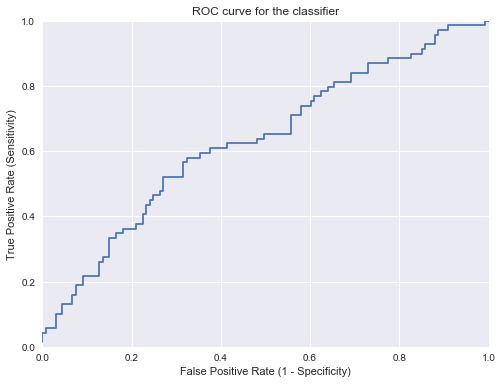

In [196]:
# Plot the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test_mode, y_pred_mode_Rforest_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for the classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [152]:
# AUC is the percentage of the ROC plot that is underneath the curve:
print(metrics.roc_auc_score(y_test_mode, y_pred_mode_Rforest_prob))

0.631687915441


In [220]:
# extracting feature importances
features = X_test_mode.columns
feature_importances = grid_Rforest.best_estimator_.feature_importances_
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head(10)

,Features,Importance Score
50,Getting up,0.049332
1,Prioritising workload,0.044702
4,Thinking ahead,0.033274
53,Questionnaires or polls,0.030991
42,Public speaking,0.027762
7,Keeping promises,0.027089
3,Workaholism,0.022262
36,Achievements,0.021940
35,Socializing,0.021621
30,Number of friends,0.021455


In [225]:
# store the predicted probabilities for class 1
y_pred_mode_dummy_prob = model_dummy.predict_proba(X_test_mode)[:, 1]

In [226]:
# store the predicted probabilities for class 1
y_pred_mode_knn_prob = grid_knn.predict_proba(X_test_mode)[:, 1]

In [229]:
# store the predicted probabilities for class 1
y_pred_mode_Rforest_prob = grid_Rforest.predict_proba(X_test_mode)[:, 1]

[(0, 1),
 (0, 1),

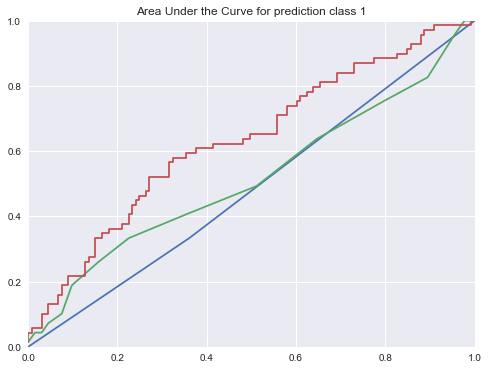

In [230]:
ax = plt.subplot(111)
vals = metrics.roc_curve(y_test_mode, y_pred_mode_dummy_prob)
ax.plot(vals[0], vals[1])
vals = metrics.roc_curve(y_test_mode, y_pred_mode_knn_prob)
ax.plot(vals[0], vals[1])
vals = metrics.roc_curve(y_test_mode, y_pred_mode_Rforest_prob)
ax.plot(vals[0], vals[1])

ax.set(title='Area Under the Curve for prediction class 1', ylabel='', xlabel='', xlim=(0, 1), ylim=(0, 1))

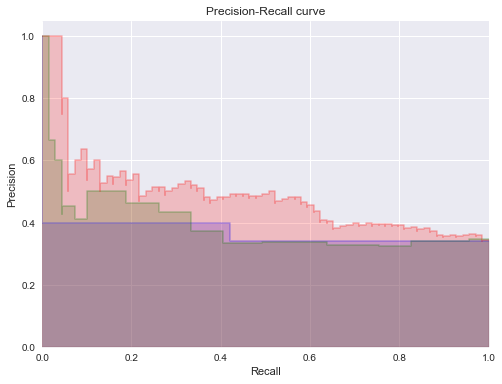

In [185]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
ax = plt.gca()

precision, recall, _ = precision_recall_curve(y_test_mode, y_pred_mode_dummy_prob)
plt.step(recall, precision, color="b", alpha=0.2, where="post")
plt.fill_between(recall, precision, step="post", alpha=0.2, color="b")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("Precision-Recall curve")

precision, recall, _ = precision_recall_curve(y_test_mode, y_pred_mode_knn_prob)
plt.step(recall, precision, color="g", alpha=0.2, where="post")
plt.fill_between(recall, precision, step="post", alpha=0.2, color="g")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("Precision-Recall curve")

precision, recall, _ = precision_recall_curve(y_test_mode, y_pred_mode_Rforest_prob)
plt.step(recall, precision, color="r", alpha=0.2, where="post")
plt.fill_between(recall, precision, step="post", alpha=0.2, color="r")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("Precision-Recall curve")
